In [1]:
# The task #1.
# Напишите программу, которая подключается к вашей виртуальной машине по SSH и читает содержимое файла /etc/services.
# Далее, используя регулярные выражения, в данных, полученных из этого файла, найдите все сетевые сервисы,
# использующие четырехзначные UDP-порты, начинающиеся с 5-ки. Выведите список этих сервисов.

In [2]:
import paramiko
import re

regexp = re.compile(r'.*\b5\d{3}\/udp\b')
regexp_res = re.compile(r'.*\t')

my_hostname = '192.168.56.101'
my_user = 'vladimir'
my_sshk = 'id_rsa.pub'
sshcon = paramiko.SSHClient()
sshcon.set_missing_host_key_policy(paramiko.AutoAddPolicy())
sshcon.connect(hostname=my_hostname, username=my_user, key_filename=my_sshk, password='')
stdin, stdout, stderr = sshcon.exec_command('cat /etc/services')
init_str = ''.join(stdout.readlines())
inter_str = '\n'.join(regexp.findall(init_str))
res = regexp_res.findall(inter_str)
print('\n'.join(res))
sshcon.close()

rfe		
mmcc		
sip		
sip-tls		
aol		
xmpp-client	
xmpp-server	
cfengine	
mdns		
postgresql	
freeciv		
amqp		
ggz		
noclog		
hostmon		
rplay		


In [3]:
# The task #2.
# Напишите программу, которая подключается к вашей виртуальной машине по SSH и получает список всех установленных пакетов
# в системе. Из полученной таблицы создайте аналогичную в локальной базе данных sqlite3. Имя файла БД - ваша фамилия.
# Из таблицы в БД получите список пакетов, имя которых начинается на букву r и содержит в номере версии слово ubuntu.

In [4]:
import paramiko
import re
import sqlite3

def pars_str(param, start, end):
    return ''.join(param.split(sep=None, maxsplit=4)[start:end])

regexp = re.compile(r'.*ii.*$')

my_hostname = '192.168.56.101'
my_user = 'vladimir'
my_sshk = 'id_rsa.pub'
sshcon = paramiko.SSHClient()
sshcon.set_missing_host_key_policy(paramiko.AutoAddPolicy())
sshcon.connect(hostname=my_hostname, username=my_user, key_filename=my_sshk, password='')
stdin, stdout, stderr = sshcon.exec_command("dpkg -l")
init_str = ''.join(stdout.readlines())

conn = sqlite3.connect("Studenikin.db")
curs = conn.cursor()
curs.execute("create table installed_prog(name text, version text, platform text, description text);")

for key in init_str.splitlines():
    name = pars_str(key, 1, 2)
    version = pars_str(key, 2, 3)
    platform = pars_str(key, 3, 4)
    desc = pars_str(key, 4, 5)
    curs.execute('''insert into installed_prog
    (name, version, platform, description)
    values(:NAME, :VERSION, :PLATFORM, :DESCRIPTION)''',
    {"NAME": name, "VERSION": version, "PLATFORM": platform, "DESCRIPTION": desc})
    del(name)
    del(version)
    del(platform)
    del(desc)
conn.commit()
print('Result:')
for row in curs.execute("select * from installed_prog where lower(name) like 'r%' and lower(version) like '%ubuntu%'"):
    print(f'Programm: {row[0]}, version: {row[1]}, platform: {row[2]}, description: {row[3]}')
conn.close()

Result:
Programm: rsyslog, version: 8.1901.0-1ubuntu4, platform: amd64, description: reliable system and kernel logging daemon
Programm: run-one, version: 1.17-0ubuntu1, platform: all, description: run just one instance of a command and its args at a time


In [5]:
# The task #3.
# Используя pandas, прочитайте CSV-данные (http://samplecsvs.s3.amazonaws.com/SalesJan2009.csv) в датафрейм.
# Определите среднее значение цены для всех платежей с Mastercard. Постройте графики цен для каждого типа платежного средства.

The average prise is 1655.05


Payment_Type
Amex          AxesSubplot(0.125,0.2;0.775x0.68)
Diners        AxesSubplot(0.125,0.2;0.775x0.68)
Mastercard    AxesSubplot(0.125,0.2;0.775x0.68)
Visa          AxesSubplot(0.125,0.2;0.775x0.68)
Name: Price, dtype: object

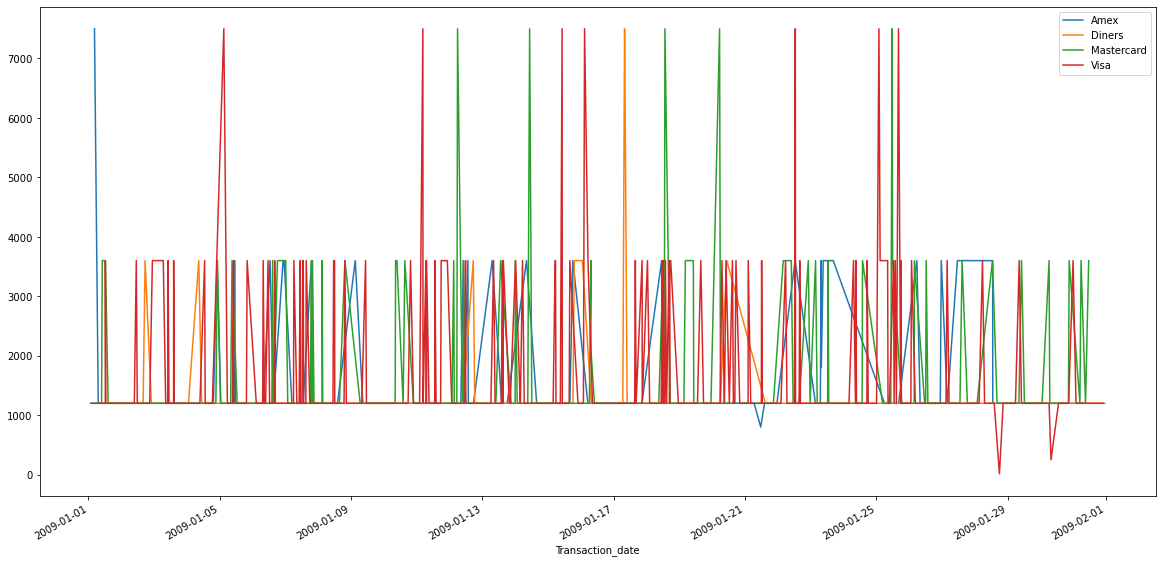

In [6]:
import pandas as pd
import matplotlib

temp = pd.read_csv('http://samplecsvs.s3.amazonaws.com/SalesJan2009.csv')
df = pd.DataFrame(data=temp)
df_avg = df.where(cond=df['Payment_Type'] == 'Mastercard')
df_avg.dropna(how='all', inplace=True)
df_avg['Price'] = pd.to_numeric(df_avg['Price'], downcast='integer')
print(f'The average prise is {df_avg["Price"].mean().round(2)}')
del(df_avg)

df_for_graph = pd.DataFrame(data=temp, columns=['Transaction_date', 'Payment_Type', 'Price'])
df_for_graph['Transaction_date'] = pd.to_datetime(df_for_graph['Transaction_date'], format="%m/%d/%y %H:%M")
df_for_graph['Price'] = pd.to_numeric(df_for_graph['Price'].str.replace(',', '.'), downcast='integer')
df_for_graph.set_index('Transaction_date', inplace=True)
df_for_graph.groupby('Payment_Type')['Price'].plot(legend=True, figsize=(20, 10))